# Census Income Analysis

Census bureau helps in providing the data about population census, we have data which is extracted from the 1994 Census bureau database.Dataset has 32560 observations and 15 features including one target columns. Dataset is containing information about certain countries'population and their respective attributes like age,education marital status working hours relation between people their losses and gain etc.
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

 The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Task

The prediction task is to determine whether a person makes over $50K a year.

#Categorical Columns
workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree

marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status

occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation

relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family

race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual

sex: (categorical) Female, Male.

native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

#Numerical Columns

age: continuous.
Age of an individual

education-num: number of education year, continuous.
Individual's year of receiving education

fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.
Individual's working hour per week

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load DataSet

In [2]:
df=pd.read_csv('census.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
# To find the Categorical Columns
cat_columns= [x for x in df.dtypes.index if df.dtypes[x]=='object']
cat_columns

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [6]:
num_columns= [x for x in df.dtypes.index if df.dtypes[x]=='int64']
num_columns

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

# EDA

# Check For Null Values

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

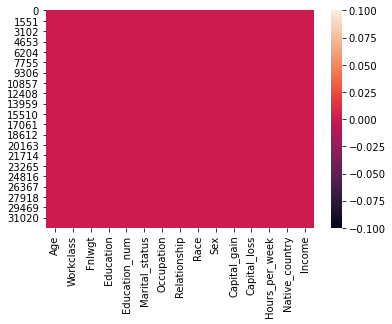

In [8]:
sns.heatmap(df.isnull())

The dataset has no null values, so we shall proceed with further analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Target Variable

In [10]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

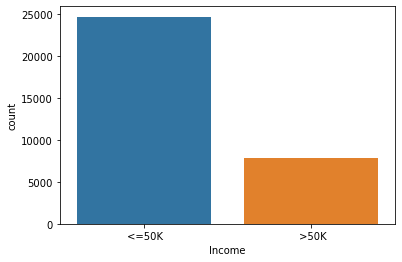

In [11]:
sns.countplot(df['Income'])

Most people has income lessthan 50k dollars.

# Categorical Variables

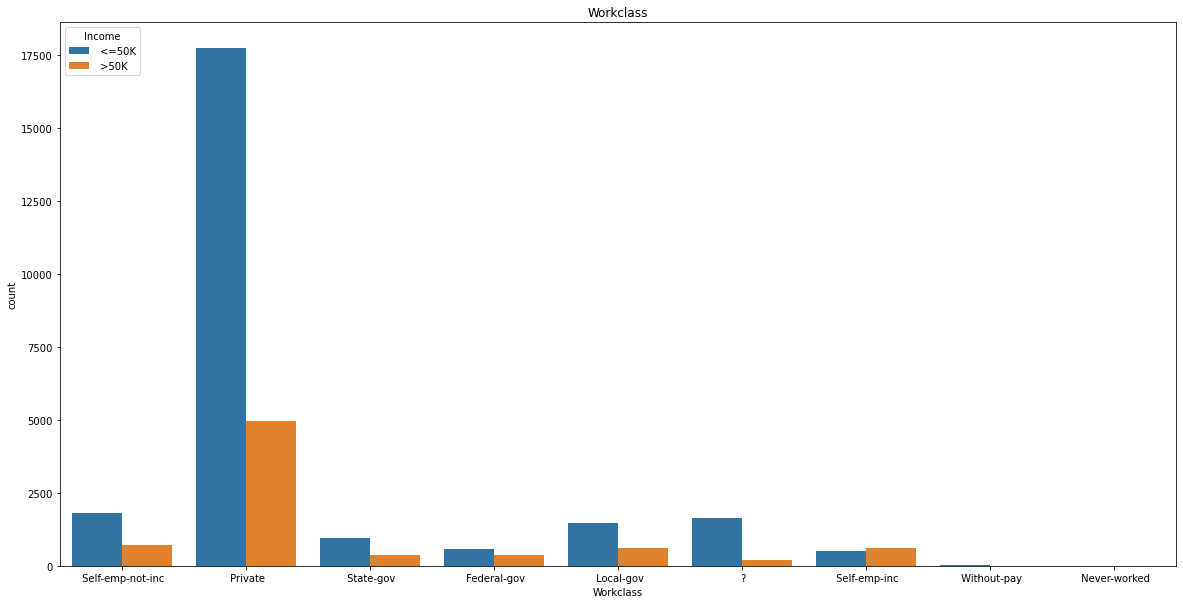

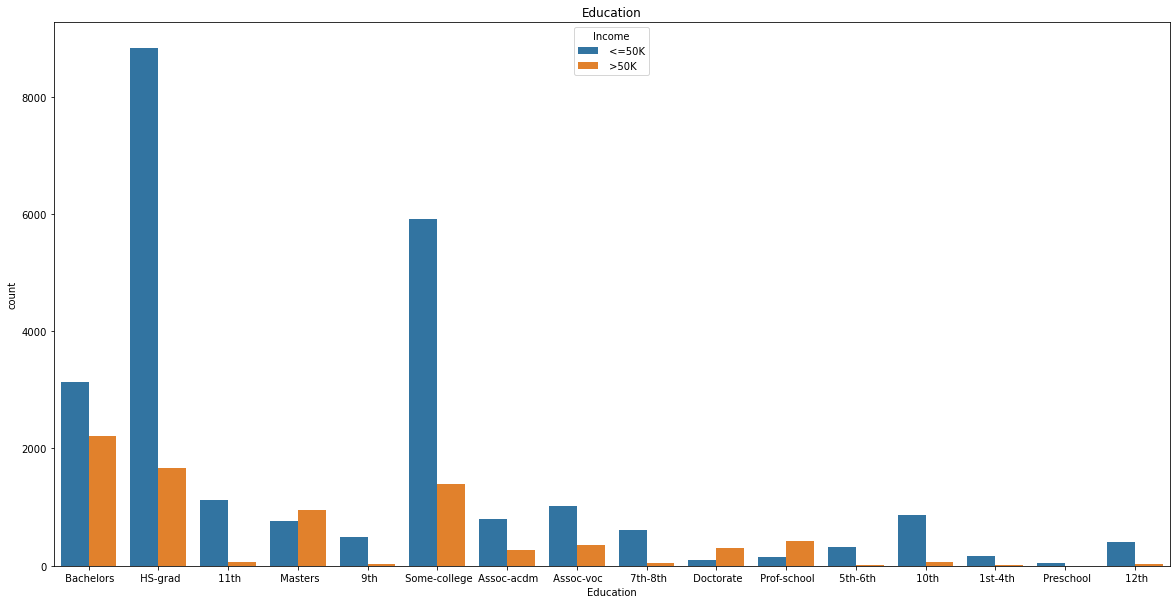

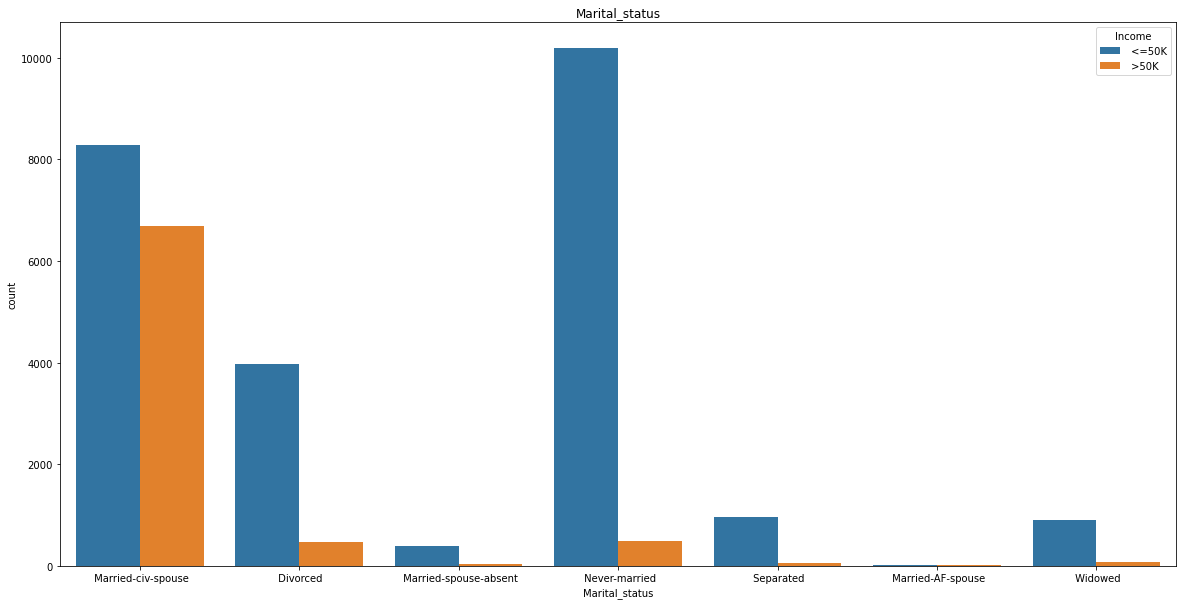

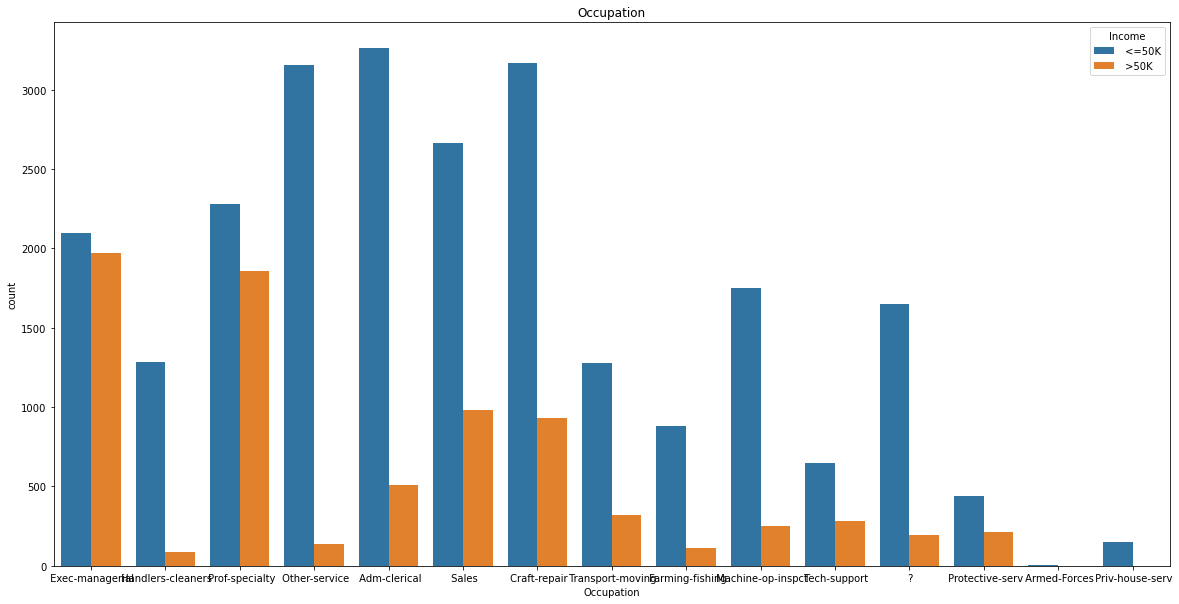

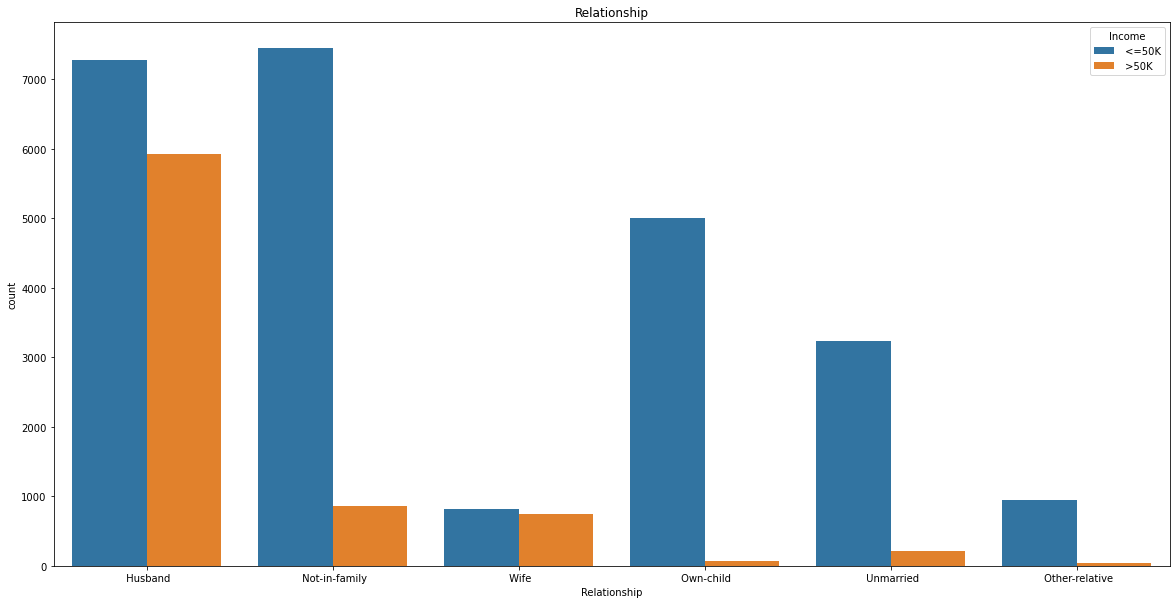

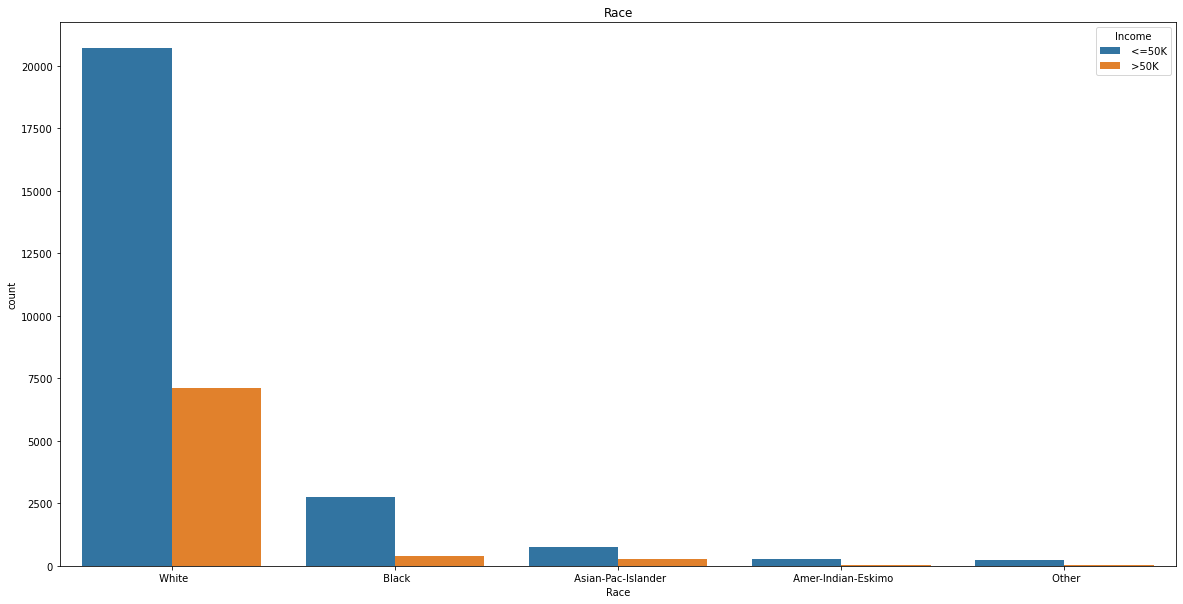

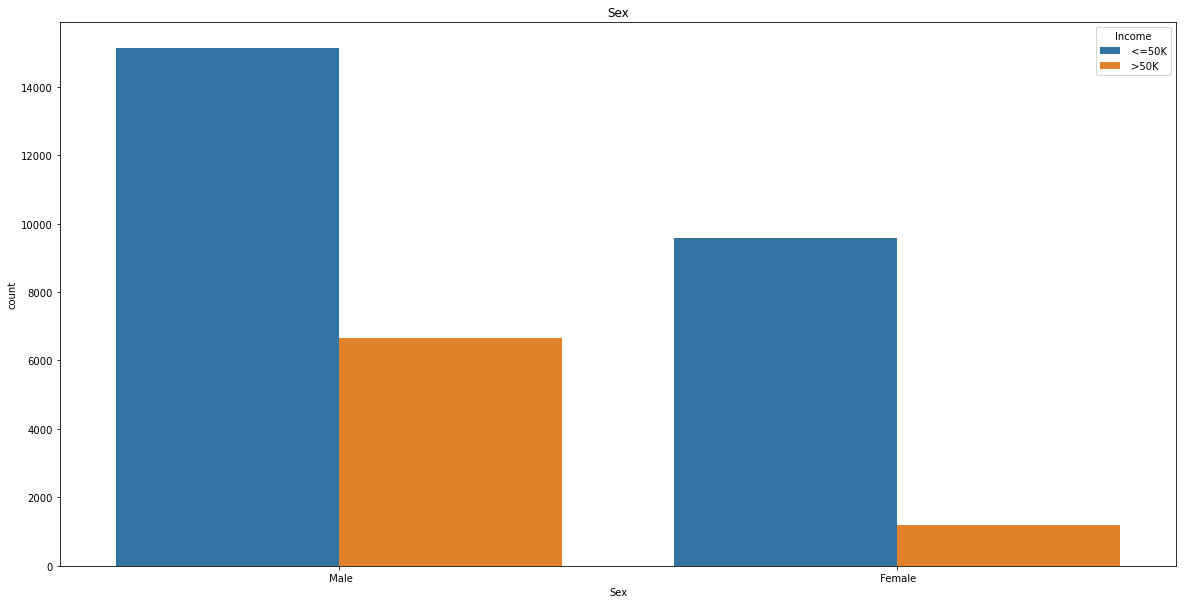

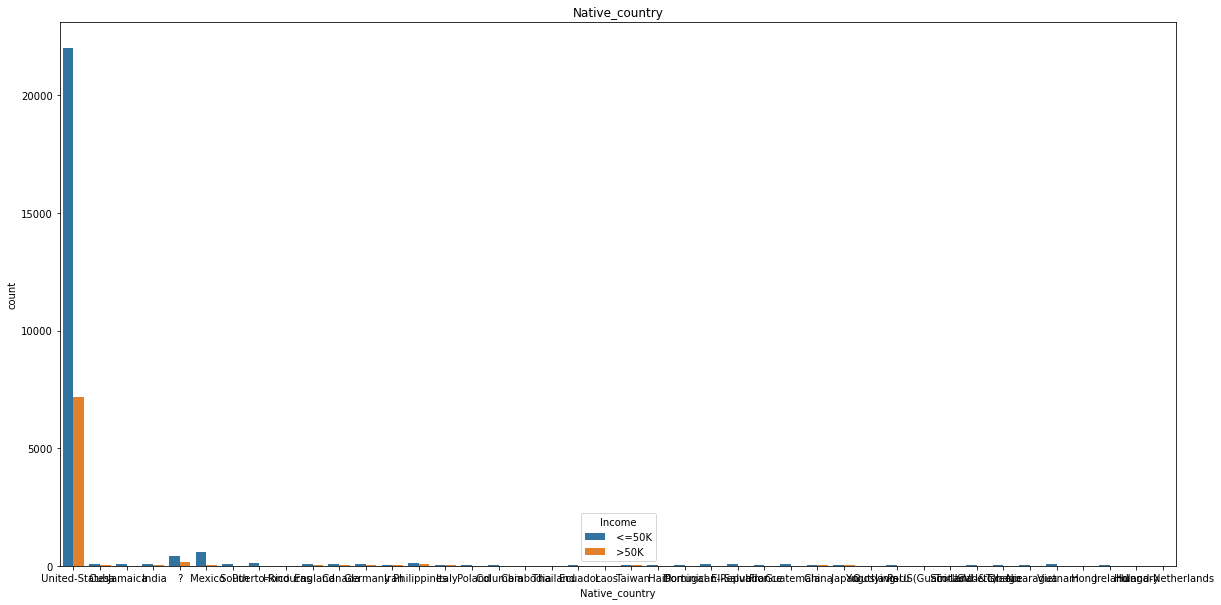

In [12]:
for i in cat_columns[:-1]:
    plt.figure(figsize=(20,10))
    sns.countplot(x=df[i], hue='Income', data=df)
    plt.title(i)
    plt.show()

Observations:
    
    Most people work for private concerns where as people with high salaries are from private sectors and self employment.
    
    People with high school grade and some college education has high income
    
    People who married civic spouse is more prone to earning income higher than 50k.
    
    Income is distributed evenly to most occupation. Clerical admins, service people have good income of more than 50k.
    
    Husband has generally more income when compared to the others in the family.
    
    The WHITES seems to earn more than 50k.
    
    Males seems to earn more than the females in the society.
    
    US citizens tend to earn more than any others

In [13]:
#Encoding the categorical data
LE= LabelEncoder()    

In [14]:
df['Income']= LE.fit_transform(df['Income'])
LE.inverse_transform([1,0])

array([' >50K', ' <=50K'], dtype=object)

In [15]:
for i in cat_columns:
    df[i]= LE.fit_transform(df[i])
    

# Bivariate Analysis

In [16]:
num_columns

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [17]:
def num_columns(df,features,target = "Income"):
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target, y = features, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + features + " vs " + target)
    
    #distribution plot
    ax[1].set_title("Distribution of "+features)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[features], ax=ax[1], kde=False)
    
    plt.show()

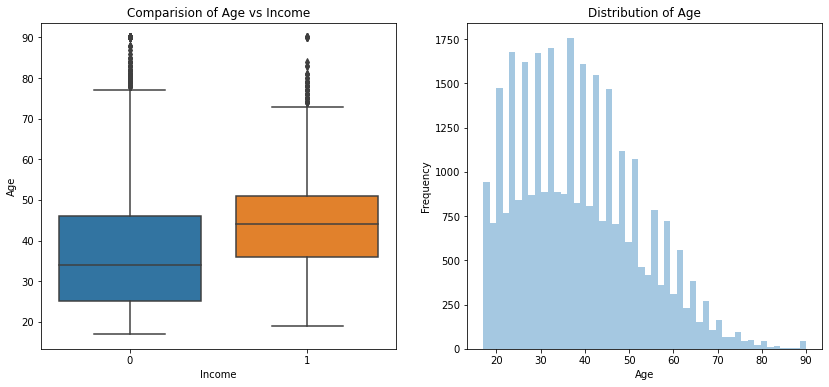

In [18]:
num_columns(df,features = "Age")

The minimum age of people is 18 and the maximum age is nearly 78. This column is slightly right skewed.

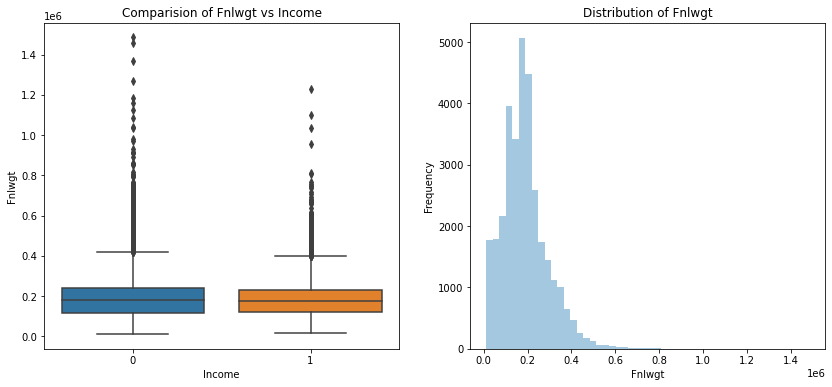

In [19]:
num_columns(df,features = "Fnlwgt")

The distribution of the this column is right skewed and the minimum wgt is nearly 0 and maximum is around 0.5.

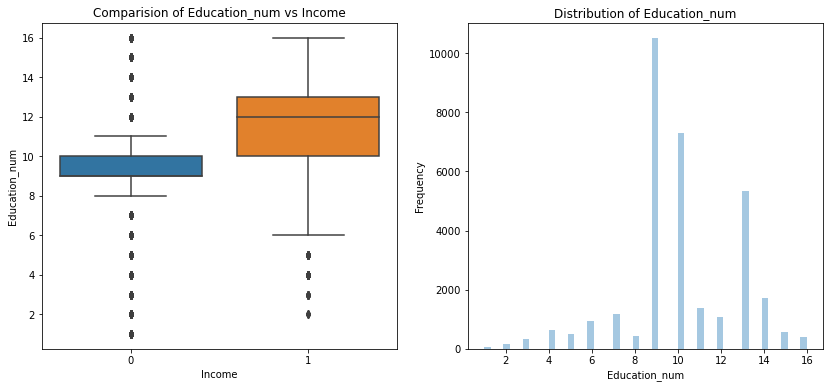

In [20]:
num_columns(df,features = "Education_num")

The distribution is scattered. A minimum of 6 years of education is required to get income of 50k.

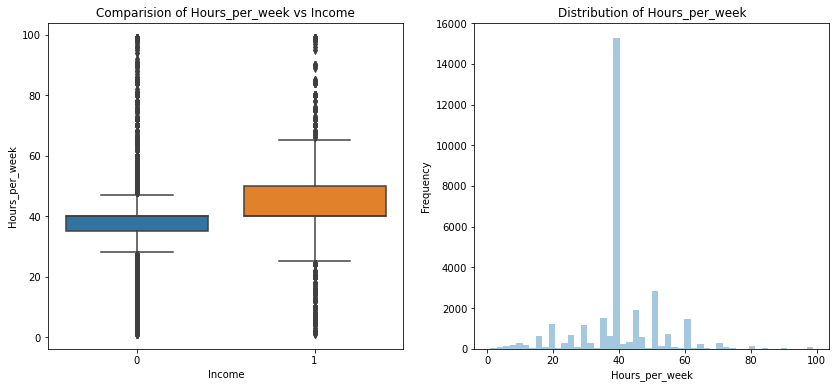

In [21]:
num_columns(df,features = "Hours_per_week")

A minimum of 22 hours of work per week is required to get a good income. 

<AxesSubplot:xlabel='Capital_loss', ylabel='Hours_per_week'>

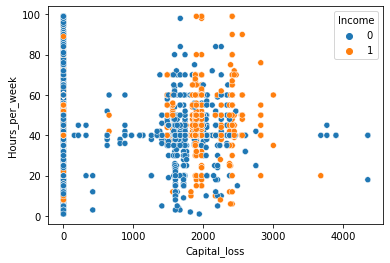

In [22]:
sns.scatterplot(x='Capital_loss',y='Hours_per_week',hue='Income',data =df)

Capitalloss is in between 1500-2500 and hours per week is in between 20-60 in that case income is greater than 50k.

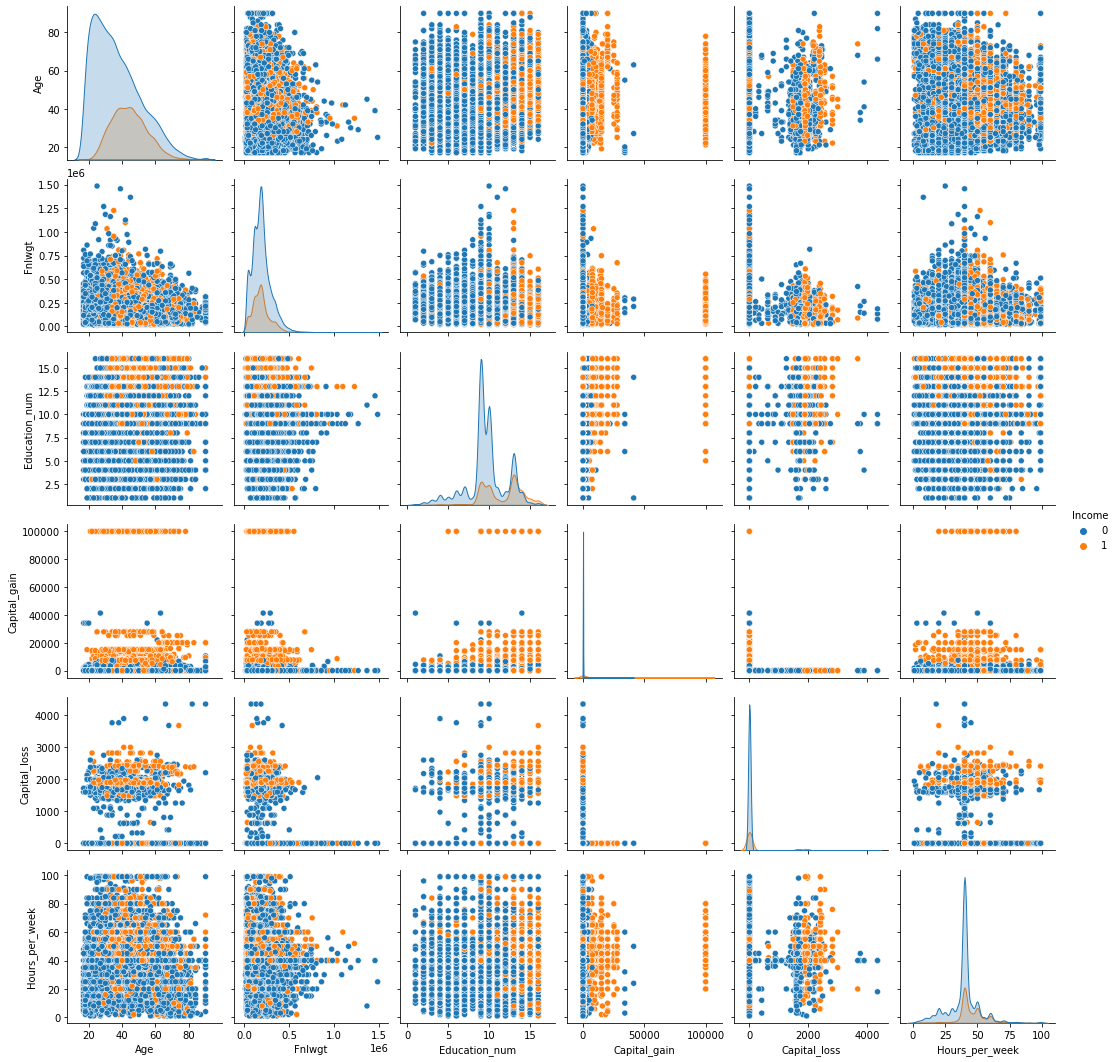

In [23]:
sns.pairplot(df, hue ='Income', vars =['Age', 'Fnlwgt', 'Education_num',
       'Capital_gain', 'Capital_loss', 'Hours_per_week'])

These columns contribute most to the Target.

# Data Description

In [24]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


There seems to be outliers in columns like Hours_per_week, occupation.



# To find Correlation

In [25]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

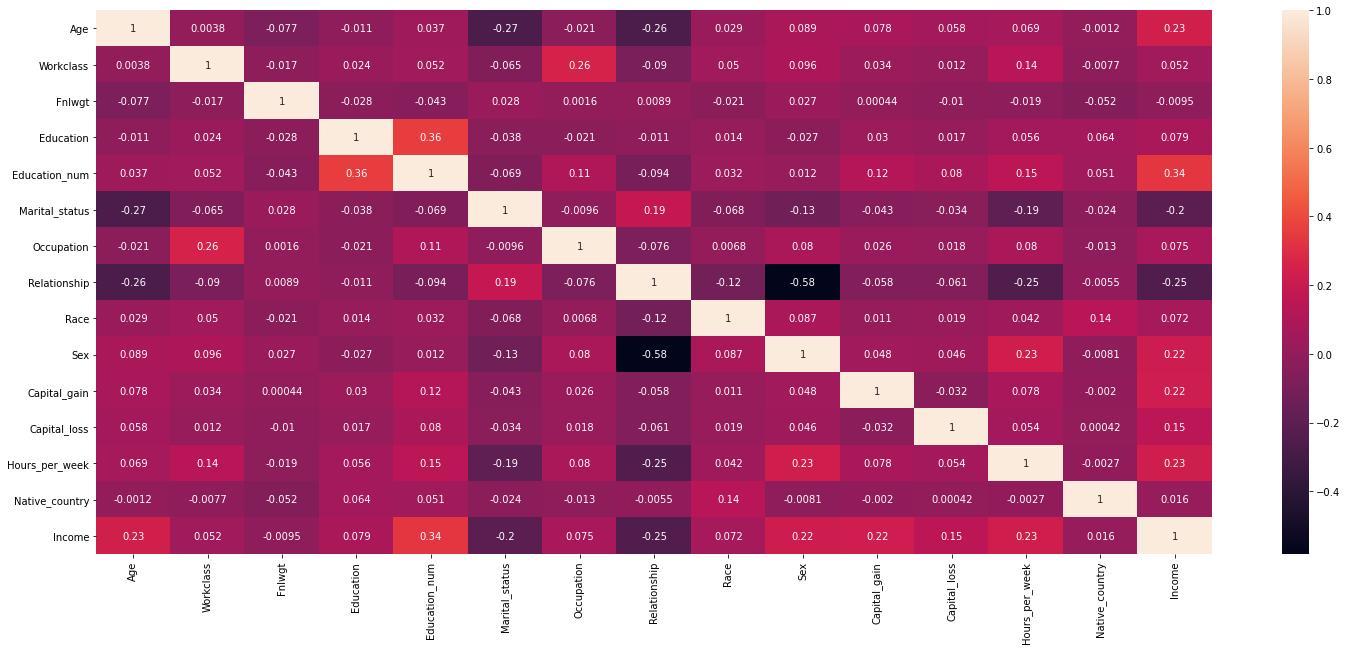

In [26]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True)

Age, Education Number, Sex, Capital gain, Hours_per_week contributes positively to target.

Now we shall check the collinearity between columns with VIF

# Check For Multi Collinearity- VIF

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
df1=df.drop('Income', axis=1)

In [29]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [30]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [31]:
vif_fun()

,vif_factor,features
0,8.521048,Age
1,8.476048,Workclass
2,4.031761,Fnlwgt
3,9.210456,Education
4,18.379852,Education_num
5,3.976061,Marital_status
6,3.711144,Occupation
7,2.612271,Relationship
8,17.577780,Race
9,4.441515,Sex


Native_country and Education_num are highly correlated. Among which Education contributes more to target, So droping Native Country.

In [32]:
df1=df.drop(['Income','Native_country'], axis=1)

In [33]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,6,83311,9,13,2,4,0,4,1,0,0,13
1,38,4,215646,11,9,0,6,1,4,1,0,0,40
2,53,4,234721,1,7,2,6,0,2,1,0,0,40
3,28,4,338409,9,13,2,10,5,2,0,0,0,40
4,37,4,284582,12,14,2,4,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20


In [34]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [35]:
vif_fun()

,vif_factor,features
0,8.181509,Age
1,8.427505,Workclass
2,4.017850,Fnlwgt
3,9.098586,Education
4,17.898636,Education_num
5,3.892409,Marital_status
6,3.709567,Occupation
7,2.524421,Relationship
8,15.546481,Race
9,4.398053,Sex


Education Number and race are highly correlated, in which education number contributes more to the target. So droping race.

In [36]:
df1= df.drop(['Income','Native_country','Race'], axis=1)

In [37]:
df1 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,6,83311,9,13,2,4,0,1,0,0,13
1,38,4,215646,11,9,0,6,1,1,0,0,40
2,53,4,234721,1,7,2,6,0,1,0,0,40
3,28,4,338409,9,13,2,10,5,0,0,0,40
4,37,4,284582,12,14,2,4,5,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,0,0,0,38
32556,40,4,154374,11,9,2,7,0,1,0,0,40
32557,58,4,151910,11,9,6,1,4,0,0,0,40
32558,22,4,201490,11,9,4,1,3,1,0,0,20


In [38]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [39]:
vif_fun()

,vif_factor,features
0,7.600640,Age
1,8.215109,Workclass
2,3.966355,Fnlwgt
3,9.019828,Education
4,17.193076,Education_num
5,3.792584,Marital_status
6,3.707564,Occupation
7,2.462880,Relationship
8,4.270987,Sex
9,1.041316,Capital_gain


The columns with multi collinearity is removed. So we shall proceed with skewness removal

# Check For Skewness

In [40]:
df1.skew().sort_values(ascending=False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Relationship       0.786784
Age                0.558738
Hours_per_week     0.227636
Occupation         0.114540
Marital_status    -0.013448
Education_num     -0.311630
Sex               -0.719244
Workclass         -0.752280
Education         -0.934063
dtype: float64

Capital_gain and loss columns have high skewness, which can be removed by using Power transform method

In [41]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_new= sc.fit_transform(df1_new)
df1_new

array([[ 0.89194656,  1.64422286, -1.08988899, ..., -0.30136989,
        -0.2212132 , -2.22151541],
       [ 0.10271741,  0.01186427,  0.39874263, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       [ 1.06438077,  0.01186427,  0.56254016, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -0.30136989,
        -0.2212132 , -0.03557001],
       [-1.35834147,  0.01186427,  0.27166793, ..., -0.30136989,
        -0.2212132 , -1.65499204],
       [ 1.00782289,  0.79430139,  0.98216482, ...,  3.31823374,
        -0.2212132 , -0.03557001]])

In [43]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.891947,1.644223,-1.089889,-0.477012,1.164793,-0.383427,-0.502825,-1.094635,0.703087,-0.301370,-0.221213,-2.221515
1,0.102717,0.011864,0.398743,0.090482,-0.464330,-1.782434,-0.013085,0.134511,0.703087,-0.301370,-0.221213,-0.035570
2,1.064381,0.011864,0.562540,-2.067600,-1.200274,-0.383427,-0.013085,-1.094635,0.703087,-0.301370,-0.221213,-0.035570
3,-0.731663,0.011864,1.340398,-0.477012,1.164793,-0.383427,0.829763,1.549018,-1.422298,-0.301370,-0.221213,-0.035570
4,0.028023,0.011864,0.957182,0.395133,1.600809,-0.383427,-0.502825,1.549018,-1.422298,-0.301370,-0.221213,-0.035570
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.011864,0.746749,-0.984718,0.739697,-0.383427,1.386870,1.549018,-1.422298,-0.301370,-0.221213,-0.197550
32556,0.247374,0.011864,-0.193298,0.090482,-0.464330,-0.383427,0.211660,-1.094635,0.703087,-0.301370,-0.221213,-0.035570
32557,1.334556,0.011864,-0.219755,0.090482,-0.464330,2.171784,-1.415274,1.351388,-1.422298,-0.301370,-0.221213,-0.035570
32558,-1.358341,0.011864,0.271668,0.090482,-0.464330,0.919719,-1.415274,1.091081,0.703087,-0.301370,-0.221213,-1.654992


In [44]:
df1.skew().sort_values(ascending=False)

Capital_loss      4.299511
Capital_gain      3.016951
Hours_per_week    0.229556
Relationship      0.122917
Workclass         0.061629
Education_num     0.023885
Fnlwgt            0.016914
Age              -0.013897
Marital_status   -0.114201
Occupation       -0.187152
Education        -0.309431
Sex              -0.719244
dtype: float64

In [45]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

In [46]:
skewed_data=df1.skew()
skewed_data

Age              -0.013897
Workclass         0.061629
Fnlwgt            0.016914
Education        -0.309431
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.187152
Relationship      0.122917
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
dtype: float64

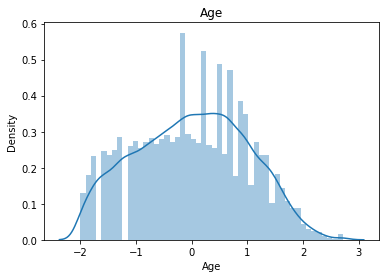

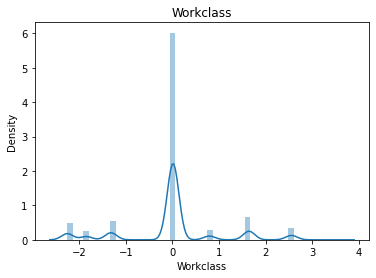

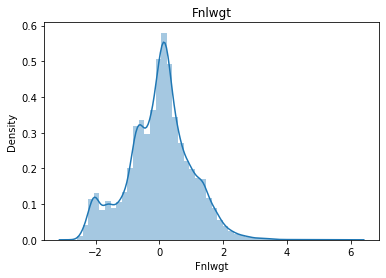

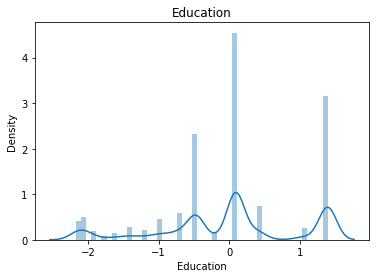

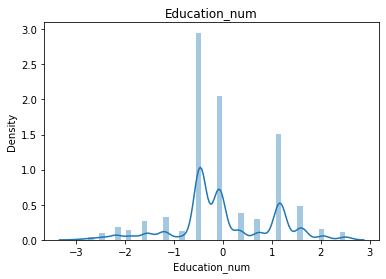

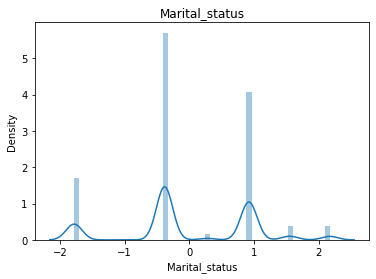

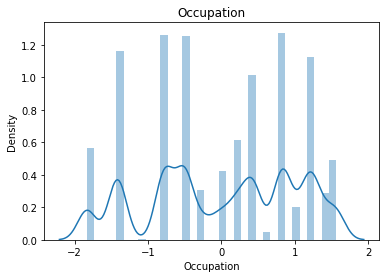

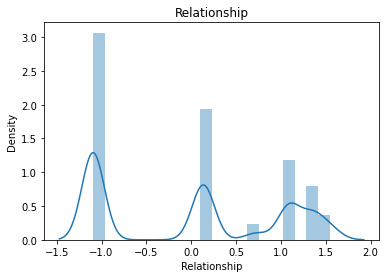

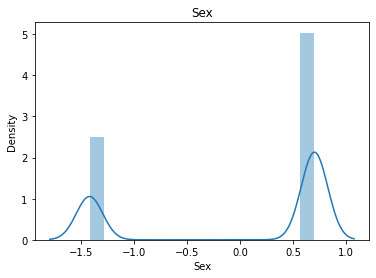

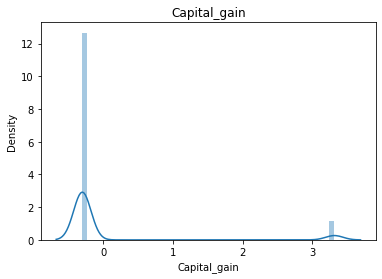

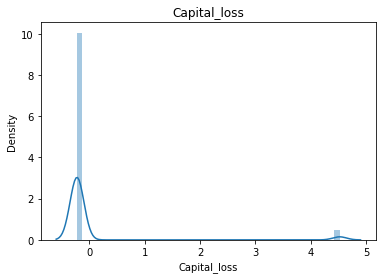

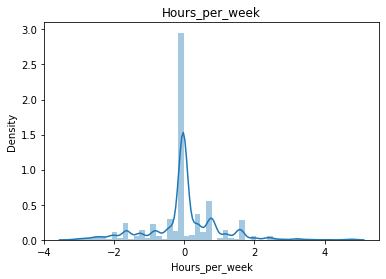

In [47]:
for i in df1.columns:
    sns.distplot(df1[i])
    plt.title(i)
    plt.show()

Normalization of the curves are not possible, but the skewness is reduced to considerable amount.

In [48]:
df1['Income']= df['Income']

In [49]:
df1.shape

(32560, 13)

# Check For Outliers

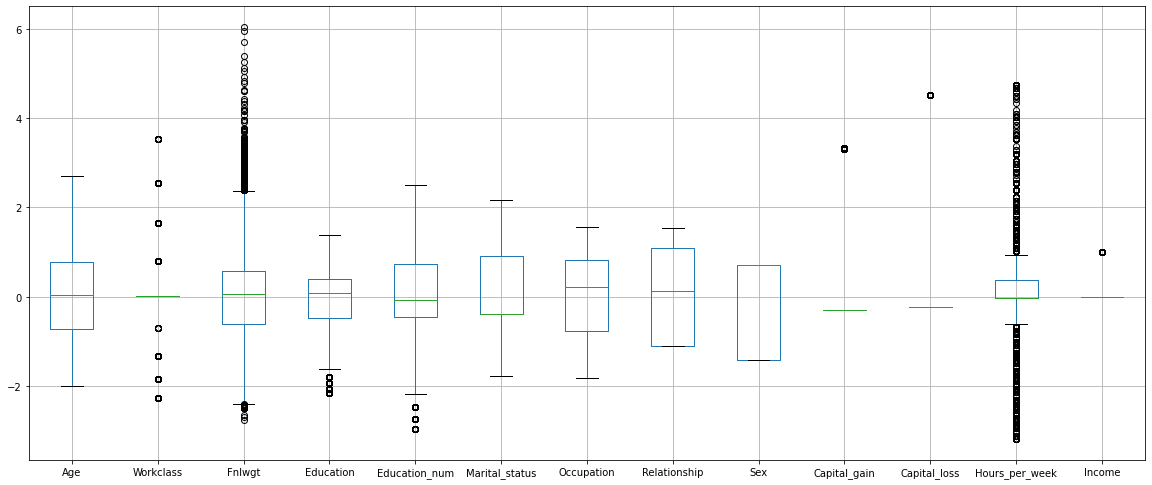

In [50]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

The columns work cass, Fnlwgt, Hours_per_week has outliers in it. It can be removed by Zscore

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.89194656, 1.64422286, 1.08988899, ..., 0.2212132 , 2.22151541,
        0.5632099 ],
       [0.10271741, 0.01186427, 0.39874263, ..., 0.2212132 , 0.03557001,
        0.5632099 ],
       [1.06438077, 0.01186427, 0.56254016, ..., 0.2212132 , 0.03557001,
        0.5632099 ],
       ...,
       [1.33455599, 0.01186427, 0.2197547 , ..., 0.2212132 , 0.03557001,
        0.5632099 ],
       [1.35834147, 0.01186427, 0.27166793, ..., 0.2212132 , 1.65499204,
        0.5632099 ],
       [1.00782289, 0.79430139, 0.98216482, ..., 0.2212132 , 0.03557001,
        1.77553698]])

In [52]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([    7,     8,     9, ..., 32537, 32547, 32559], dtype=int64), array([ 9,  9, 11, ...,  9,  9,  9], dtype=int64))


In [53]:
z[7][9]

3.3182330542873606

In [54]:
df1_new= df1[(z<3).all(axis=1)]

In [55]:
df1_new.shape

(27848, 13)

In [56]:
df1.shape

(32560, 13)

# Loss Percent

In [57]:
Loss= (32560-27848)/32560*100
Loss

14.471744471744472

Nearly 14% of the data are removed as outliers. The presence of which may give noisy data for training of the dataset

# Spliting the data and Balancing 

In [58]:
x= df1.iloc[:,0:-1]
y= df1.iloc[:,-1]

In [59]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

The data seems to be highly imbalanced, so to balance the dataset we shall use SMOTE

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [62]:
y1.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

Now the model is balanced. So we will proceed to train the model

Since the Target variable is categorical with only 2 classes, we use LogisticRegression models to train our data

# Train The Model

In [63]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [64]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.7899474110032363 on Random_state 60


# DecisionTreeClassifier

In [65]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=.20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(xtrain,ytrain)
    preddtc= dtc.predict(xtest)
    acc=accuracy_score(ytest,preddtc)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.8599312297734628 on Random_state 57


# To Find the Best Cross Validation Score 

In [66]:
pred_tr= dtc.predict(xtrain)
pred_ts= dtc.predict(xtest)

In [67]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [68]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(dtc,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8348436425421741 and accuracy score for training is 0.9999747155499368 and the accuracy for testing is 0.8530542071197411


At cross fold 3 the cv score is 0.8379600134897588 and accuracy score for training is 0.9999747155499368 and the accuracy for testing is 0.8530542071197411


At cross fold 4 the cv score is 0.8458081250355138 and accuracy score for training is 0.9999747155499368 and the accuracy for testing is 0.8530542071197411


At cross fold 5 the cv score is 0.8504605112201535 and accuracy score for training is 0.9999747155499368 and the accuracy for testing is 0.8530542071197411


At cross fold 6 the cv score is 0.8493682343350023 and accuracy score for training is 0.9999747155499368 and the accuracy for testing is 0.8530542071197411


At cross fold 7 the cv score is 0.8509264503229366 and accuracy score for training is 0.9999747155499368 and the accuracy for testing is 0.8530542071197411


At cross fold 8 the cv score is 0.853049562119529 an

The accuracy score is best at Random State 19, cv is good at cv=3. So we can use this to test the other models

# Check The Accuracy and Error

In [69]:
xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=.20,random_state=57)

# Logistic Regression

In [70]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predlg,ytest))

[[3820  989]
 [1121 3958]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      4809
           1       0.80      0.78      0.79      5079

    accuracy                           0.79      9888
   macro avg       0.79      0.79      0.79      9888
weighted avg       0.79      0.79      0.79      9888

Score: 0.778204804045512
Acc_score: 0.7866100323624595


In [71]:
cr_lg=cross_val_score(lg,x1,y1, cv=3)
print('Cross Validation Score of LogisticRegression is:', cr_lg.mean())

Cross Validation Score of LogisticRegression is: 0.7801287472670424


The accuracy score and cv score is nearly equal implying the model works 78% well.

# GaussianNB

In [72]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
predgnb= gnb.predict(xtest)
print( confusion_matrix(predgnb,ytest))
print( classification_report(predgnb,ytest))
print('Score:', gnb.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predgnb,ytest))

[[3850  943]
 [1091 4004]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4793
           1       0.81      0.79      0.80      5095

    accuracy                           0.79      9888
   macro avg       0.79      0.79      0.79      9888
weighted avg       0.79      0.79      0.79      9888

Score: 0.7814159292035399
Acc_score: 0.7942961165048543


In [73]:
cr_gnb=cross_val_score(gnb,x1,y1, cv=3)
print('Cross Validation Score of GaussianNB is:', cr_gnb.mean())

Cross Validation Score of GaussianNB is: 0.7841135346624349


The accuracy score and cv score is nearly equal implying the model works 79% well.

# DecisionTreeClassifier

In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
print('Score:', dtc.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[4203  699]
 [ 738 4248]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4902
           1       0.86      0.85      0.86      4986

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888

Score: 0.9999747155499368
Acc_score: 0.8546723300970874


In [75]:
cr_dtc=cross_val_score(dtc,x1,y1, cv=3)
print('Cross Validation Score of DecisionTreeClassifier is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.8372116242482587


The accuracy score and cv score is not equal

# RandomForestClassifier

In [76]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[4424  443]
 [ 517 4504]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4867
           1       0.91      0.90      0.90      5021

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

Acc_score: 0.9029126213592233


In [77]:
cr_rf=cross_val_score(rf,x1,y1, cv=3)
print('Cross Validation Score of RandomForestClassifier is:', cr_rf.mean())

Cross Validation Score of RandomForestClassifier is: 0.8902069720096835


The accuracy score and cv score is nearly equal implying the model works 90% well.

# SVC

In [78]:
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[3801  504]
 [1140 4443]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      4305
           1       0.90      0.80      0.84      5583

    accuracy                           0.83      9888
   macro avg       0.83      0.84      0.83      9888
weighted avg       0.84      0.83      0.83      9888

Acc_score: 0.8337378640776699


In [79]:
cr_svc=cross_val_score(svc,x1,y1, cv=3)
print('Cross Validation Score of SVC is:', cr_svc.mean())

Cross Validation Score of SVC is: 0.8237793931022538


The accuracy Score of RandomForestClassifier is higher than other models. So we shall improve it with Hyper Parameter Tuning

# HyperParameter Tuning With GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
RandomForestClassifier()

RandomForestClassifier()

In [82]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["gini", "entropy"],
            'max_depth':[3,4,5,6],
            'min_samples_split':[2,3,4]}

In [83]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=3, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [84]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=4)

In [85]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.8380865695792881

In [91]:
rf=RandomForestClassifier(criterion='entropy',
                          max_depth=6,
                          max_features='sqrt',
                          min_samples_leaf= 3,
                          min_samples_split=4)
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[3819  465]
 [1122 4482]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      4284
           1       0.91      0.80      0.85      5604

    accuracy                           0.84      9888
   macro avg       0.84      0.85      0.84      9888
weighted avg       0.85      0.84      0.84      9888

Acc_score: 0.839502427184466


The accuracyis nearly 85% after tuning the parameters. So the model is performing good with the dataset

# AUC-ROC Curve

In [87]:
# ROC Curve

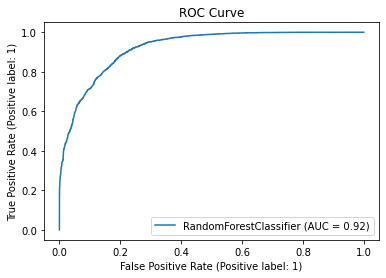

In [92]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,xtest,ytest)
plt.title('ROC Curve')
plt.show()

AUC-ROC Curve shows that the model perfoms 92% well.

Area Under Curve is 92% fit. So the model has good performance

# Save The Model

In [93]:
import pickle
filename= 'Census.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [94]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con[0:20]

,original,Predicted
0,0,1
1,1,0
2,1,1
3,0,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


The predicted results are nearly equal to the actual results. The model gave good prediction.  